In [266]:
import pandas as pd
import numpy as np


Part 1: Data Preparation (Python)

In [267]:
df=pd.read_csv('dataset.csv')

In [268]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [269]:
df['SUPPLIER'].fillna(method='ffill', inplace=True)
df['ITEM TYPE'].fillna(method='ffill', inplace=True)
df['RETAIL SALES'].fillna(method='ffill', inplace=True)


In [270]:
df.head(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [271]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

Part 2: Exploratory Data Analysis (Python)

In [272]:
yearsales = df[['YEAR', 'MONTH', 'RETAIL SALES', 'WAREHOUSE SALES']]
yearsales['totalsales'] = df['RETAIL SALES'] +df['WAREHOUSE SALES']


C:\Users\Dell\AppData\Local\Temp\ipykernel_24408\2657470887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearsales['totalsales'] = df['RETAIL SALES'] +df['WAREHOUSE SALES']


In [273]:
yearsales

,YEAR,MONTH,RETAIL SALES,WAREHOUSE SALES,totalsales
0,2020,1,0.00,2.0,2.00
1,2020,1,0.00,4.0,4.00
2,2020,1,0.00,1.0,1.00
3,2020,1,0.00,1.0,1.00
4,2020,1,0.82,0.0,0.82
...,...,...,...,...,...
307640,2020,9,29.00,575.0,604.00
307641,2020,9,6.50,35.0,41.50
307642,2020,9,1.00,64.0,65.00
307643,2020,9,0.17,1.0,1.17


In [274]:
grouped = yearsales.groupby(['YEAR'])
grouped


In [275]:
result = grouped['totalsales'].sum()
result


YEAR
2017    3020583.70
2018     673122.09
2019    4503562.43
2020    1745388.61
Name: totalsales, dtype: float64

In [276]:
import matplotlib.pyplot as plt
result_df = result.reset_index()
result_df


,YEAR,totalsales
0,2017,3020583.70
1,2018,673122.09
2,2019,4503562.43
3,2020,1745388.61


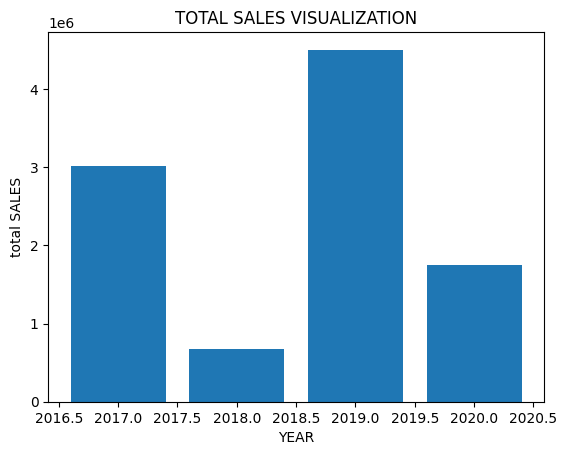

In [277]:
plt.bar(result_df['YEAR'], result_df['totalsales'])

# Add labels and title
plt.xlabel('YEAR')
plt.ylabel('total SALES')
plt.title('TOTAL SALES VISUALIZATION')

# Display the plot
plt.show()


In [278]:
totalsales=df[['SUPPLIER','RETAIL SALES', 'WAREHOUSE SALES']]
totalsales


,SUPPLIER,RETAIL SALES,WAREHOUSE SALES
0,REPUBLIC NATIONAL DISTRIBUTING CO,0.00,2.0
1,PWSWN INC,0.00,4.0
2,RELIABLE CHURCHILL LLLP,0.00,1.0
3,LANTERNA DISTRIBUTORS INC,0.00,1.0
4,DIONYSOS IMPORTS INC,0.82,0.0
...,...,...,...
307640,CROWN IMPORTS,29.00,575.0
307641,DIAGEO NORTH AMERICA INC,6.50,35.0
307642,MILLER BREWING COMPANY,1.00,64.0
307643,DOPS INC,0.17,1.0


In [279]:
totalsales['sum total']=totalsales['RETAIL SALES']+totalsales['WAREHOUSE SALES']

C:\Users\Dell\AppData\Local\Temp\ipykernel_24408\511469714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalsales['sum total']=totalsales['RETAIL SALES']+totalsales['WAREHOUSE SALES']


In [280]:
grouped = totalsales.groupby(['SUPPLIER'])
result = grouped['sum total'].sum()
result
result_df = result.reset_index()
result_df
result_df=result_df.sort_values(by='sum total')


In [281]:
result_df

,SUPPLIER,sum total
258,PREMIUM DISTRIBUTORS INC,-53782.00
107,Default,-4900.96
154,HAMCO DC,0.00
177,KAHN PAPER COMPANY INC,0.00
244,PACIFIC RIM WINEMAKERS,0.00
...,...,...
108,E & J GALLO WINERY,363634.31
158,HEINEKEN USA,885878.37
15,ANHEUSER BUSCH INC,1441131.66
214,MILLER BREWING COMPANY,1512585.15


In [282]:
result_df.tail(5)

,SUPPLIER,sum total
108,E & J GALLO WINERY,363634.31
158,HEINEKEN USA,885878.37
15,ANHEUSER BUSCH INC,1441131.66
214,MILLER BREWING COMPANY,1512585.15
81,CROWN IMPORTS,1736309.17


In [283]:
item_sales = df.groupby(['ITEM DESCRIPTION', 'ITEM TYPE'])[
    'WAREHOUSE SALES'].sum().reset_index()

# Sort the items by total sales in descending order
item_sales_sorted = item_sales.sort_values(
    by='WAREHOUSE SALES', ascending=False)

# Select the top 10 best-selling items
top_10_items = item_sales_sorted.head(10)


In [284]:
top_10_items

,ITEM DESCRIPTION,ITEM TYPE,WAREHOUSE SALES
9304,CORONA EXTRA LOOSE NR - 12OZ,BEER,303160.83
9301,CORONA EXTRA 2/12 NR - 12OZ,BEER,247924.43
16417,HEINEKEN LOOSE NR - 12OZ,BEER,171950.21
16405,HEINEKEN 2/12 NR - 12OZ,BEER,154654.49
22186,MILLER LITE 30PK CAN - 12OZ,BEER,134486.40
9303,CORONA EXTRA 4/6 NR - 12OZ,BEER,125111.38
22303,MODELO ESPECIAL 24 LOOSE NR - 12OZ,BEER,116987.30
9299,CORONA EXTRA 18PK NR - 12OZ,BEER,100302.27
16408,HEINEKEN 4/6 NR - 12OZ,BEER,99406.15
5136,BUD LIGHT 30PK CAN,BEER,96316.97


PART 3 

In [285]:
# df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
# df['MONTH'] = pd.to_datetime(df['MONTH'], format='%m')

# Group the data by 'YEAR' and 'MONTH' and calculate the monthly average
monthly_avg_sales = df.groupby(['YEAR', 'MONTH'])[
    ['RETAIL SALES', 'WAREHOUSE SALES']].mean().reset_index()


In [286]:
df['MONTH'].value_counts()

1     37724
9     37380
7     36710
11    27381
10    26712
8     26003
6     25958
2     25389
3     24206
12    14500
5     12948
4     12734
Name: MONTH, dtype: int64

In [287]:
monthly_avg_sales

,YEAR,MONTH,RETAIL SALES,WAREHOUSE SALES
0,2017,6,7.143914,27.839069
1,2017,7,7.112985,24.332153
2,2017,8,6.409991,28.122641
3,2017,9,6.757254,22.817909
4,2017,10,6.549021,22.289367
5,2017,11,6.765496,23.348862
6,2017,12,9.078241,21.169463
7,2018,1,5.679413,19.072137
8,2018,2,5.939247,20.229658
9,2019,1,6.141102,22.625988


In [288]:
item_type_sales = df.groupby(
    'ITEM TYPE')['WAREHOUSE SALES'].sum().reset_index()

# Find the item type that contributes the most to overall sales
most_contributing_item_type = item_type_sales.loc[item_type_sales['WAREHOUSE SALES'].idxmax(
)]

# Print the total sales for each item type and the most contributing item type
print("Total Sales for Each Item Type:")
print(item_type_sales)

print("\nItem Type Contributing the Most to Overall Sales:")
print(most_contributing_item_type)


Total Sales for Each Item Type:
      ITEM TYPE  WAREHOUSE SALES
0          BEER       6527236.51
1       DUNNAGE       -121454.00
2          KEGS        118432.00
3        LIQUOR         94906.27
4   NON-ALCOHOL         26149.59
5           REF        -20499.00
6  STR_SUPPLIES             0.00
7          WINE       1156984.91

Item Type Contributing the Most to Overall Sales:
ITEM TYPE                BEER
WAREHOUSE SALES    6527236.51
Name: 0, dtype: object


In [289]:
# # Convert 'YEAR' and 'MONTH' columns to datetime
# df['DATE'] = pd.to_datetime(df['YEAR'].astype(
#     str) + df['MONTH'].astype(str), format='%Y%m')

# # Set 'DATE' as the index for time series analysis
# df.set_index('DATE', inplace=True)

# # Group by month and calculate the average sales for each month
# monthly_avg_sales = df['RETAIL SALES'].resample('M').mean()

# # Calculate the seasonal component by subtracting the monthly averages from the original data
# seasonal_component = df['RETAIL SALES'] - monthly_avg_sales

# # Create subplots for the original time series, seasonal component, and trend component
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# # Original time series
# ax1.set_title('Original Retail Sales')
# ax1.plot(df['RETAIL SALES'], label='Original', color='blue')

# # Seasonal component
# ax2.set_title('Seasonal Component')
# ax2.plot(seasonal_component, label='Seasonal', color='green')

# # Trend component (approximated by a moving average)
# window_size = 12  # Assuming a yearly seasonality
# trend_component = df['RETAIL SALES'].rolling(window=window_size).mean()
# ax3.set_title('Trend Component')
# ax3.plot(trend_component, label='Trend', color='red')

# # Add labels and legends
# plt.xlabel('Year')
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper left')
# ax3.legend(loc='upper left')

# # Show the plot
# plt.tight_layout()
# plt.show()
